### To run experiment and evaluate it:
  - We will use **graphpattern2vec_process-multithread-Edited2022** notebook
    - All the cells should be run until **Link Prediction**.
    - Stop using the notebook, and manually run the metapath2vec to generate walk files.
    - Run all rest of cells after **Link Prediction**


In [1]:
from graphpattern2vec import split_data as sp
from graphpattern2vec import biased_walk as BW
from graphpattern2vec import biased_walk_multiprocess as BWMP
# from graphpattern2vec import check_walks as CW
from graphpattern2vec import CheckWalks as CW
from graphpattern2vec import link_prediction as LP

#### Initialization 

In [2]:
data_path = 'data/'
main_edge_file = 'df_edges.csv'
relation_to_predict = 'hasPathway'
train_file = 'df_train.csv'

node_file = 'df_node.csv'
relation_file = 'df_relation.csv'
type_file = 'df_type.csv'
test_file = 'df_test.csv'

result_path = 'results/'

source_types = ['Protein', 'LightKinase', 'DarkKinase']
target_types = ['Pathway']

### Split

In [3]:
split_pred = 0.5


sp.split_process(data_path,main_edge_file ,relation_to_predict, split_pred, train_file_name = train_file, test_file_name=test_file)

df_edges: (6279373, 10)
number of total node in data based on the Networkx's Graph 9272
df_interest: 68856, count_msp: 5, sum_edges: 59590
all removed nodes 8905 in the train 9272(should be equal to nodes in graph).
number of candidate edges to remove: 59590
total number of edge of interest: (68856, 10)
edge_to_index: 137712, index_to_edge: 68856
candidates_indices: 59590 == unique 59590
The minimum of 34428.0 and 59590 is 34428.
selected indices: 34428, df_test_edges: (34428, 10)
indices of the rest of interest: 34428, df_interest_rest: (34428, 10)
rest of edges except the edge of interest: (6210517, 10)
df_train: (6244945, 10)
True
saving file df_test.csv ...
file df_test.csv and size (34428, 10) is saved.
saving file df_train.csv ...
file df_train.csv and size (6244945, 10) is saved.
split is done.


### Walks

#### Types
- 0,Protein
- 1,Pathway
- 2,LightKinase
- 3,DarkKinase

- 4,PTM
- 5,FunctionalDomain
- 6,BiologicalProcess
- 7,MolecularFunction
- 8,CellularComponent
- 9,Chemical
- 10,Disease

In [4]:
import imp
imp.reload(BWMP)

<module 'graphpattern2vec.biased_walk_multiprocess' from '/hdd/BigIronOnHisHip/r2v/newRegpatterin/RegPattern2Vec_project-main/notebooks/graphpattern2vec/biased_walk_multiprocess.py'>

In [5]:
graph_pattern = [{0:1,2:1,3:1}, {0:1, 2:1, 3:1, 4:1,5:1, 6:1, 7:1, 8:1, 9:1, 10:1}, {0:1,2:1,3:1}, {1:1}]
graph_pattern

[{0: 1, 2: 1, 3: 1},
 {0: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1},
 {0: 1, 2: 1, 3: 1},
 {1: 1}]

In [6]:
loop_index = []
type_loop = {}
num_allow_loop = 0
num_processes = 0 # zero for number of cores

biasedwalk = BWMP.BiasedWalk(graph_pattern, loop_index, type_loop, data_path = data_path, 
                            train_file = train_file, postfix='', num_processes = num_processes)

loading data ...
df_train: (6244945, 5)
based on graphpattern df_train_sel: (6244945, 5), set_sel_types: 11
h: 1020715, t: 98719
nodes: 1064097
types of node and their counts:
type_to_node: 11


Nodes:   4%|▍         | 40380/1064097 [00:00<00:02, 403768.62it/s]

id_to_type: 1064097


Edges: 100%|██████████| 6244945/6244945 [00:43<00:00, 144890.03it/s]


In [7]:
all_nw = 40
all_wl = 40

walk_file_prefix = 'walk_test_REL_simplified_sep_probs'
loop_chance = 0
num_source = 0

initials = {0:'v', 1:'a', 2:'v', 3:'v',4:'f',5:'f', 6:'f', 7:'f', 8:'f', 9:'f', 10:'f'}
walk_file_name = biasedwalk.walk_progress(initials, all_nw = all_nw, all_wl = all_wl, num_source = num_source, 
                                          num_allow_loop = num_allow_loop, walk_file_prefix = walk_file_prefix, 
                                          loop_chance = loop_chance)

assign scores of neighbours: 100%|██████████| 1064097/1064097 [01:41<00:00, 10457.25it/s]


allowed attr prepared.
scores attr prepared.
nei_scores attr prepared
added attributes to the graph
source nodes: 1014602, target_nodes: 1974
source nodes: 1014602, selected_nodes: 1014602
job_number: 6, chunks for thread: 6


  0%|          | 0/169100 [00:00<?, ?it/s]/hdd/BigIronOnHisHip/r2v/newRegpatterin/RegPattern2Vec_project-main/notebooks/graphpattern2vec/biased_walk_multiprocess.py:406: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  p_index = np.where(all_d == pnode)
  0%|          | 0/169100 [00:00<?, ?it/s]/hdd/BigIronOnHisHip/r2v/newRegpatterin/RegPattern2Vec_project-main/notebooks/graphpattern2vec/biased_walk_multiprocess.py:406: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  p_index = np.where(all_d == pnode)
  0%|          | 0/169100 [00:00<?, ?it/s] 5.97it/s]/hdd/BigIronOnHisHip/r2v/newRegpatterin/RegPattern2Vec_project-main/notebooks/graphpattern2vec/biased_walk_multiprocess.py:406: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  p_index = np.where(all_d =

KeyboardInterrupt: 

In [ ]:
walk_file_name
#emb_walk_final_100_40_0_3_bwV4_s128_w7_n5_mc5

In [ ]:
list_embedding_file = 'GP2VEC_emb_walk_file_40_40_0_0_bwV4_s256_w7_n5_mc5'

### Link Prediction

In [ ]:
import imp
imp.reload(LP)

In [ ]:
[source_types, target_types]

In [ ]:
lp = LP.LinkPrediction(data_path, train_file, node_file, relation_file, type_file
                , list_embedding_file ,test_file, result_path, 
                    [source_types, target_types])

In [ ]:
#lp.draw_pca_of_all_nodes() #this code runs the pca not need but you can still run it if you want to see

In [ ]:
ver_name = list_embedding_file[19:] + '.png'

scoring = ('accuracy', 'f1', 'roc_auc') # accuracy, f1_micro, roc_auc, roc_auc_ovr

lp.train_model_cross_validation('newton-cg', 'ovr', C=1, penalty='l2', cv = 10, ver = ver_name, scoring=scoring)

__load_test_set| df_test_set: (34428, 10)
__load_test_set| unique heads: 6301, unique tails: 1791
6413
5153
5153
5153
2259
2259
2259
__get_test_set_emb| test set emb list : positive 34421 with 7 errors, negative: 34276, with 114 errors.
{False, True}
__prepare_test_set_emb| list of test set prepared 68697
save_list_of_test_embs| lst: 68697 to save.
save_list_of_test_embs| data/test_set_embeddings.csv is saved.
__test| 68697 and 68697
__test| 256 and 1
__AUC_ROC| roc_auc_lr: 0.9576201564877593


/home/kochut/graphpattern2vec_project/graphpattern2vec/link_prediction.py:953: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


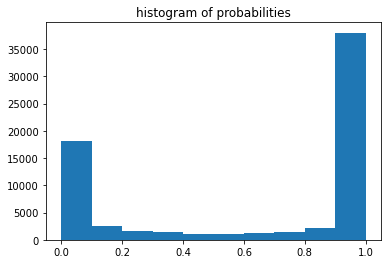

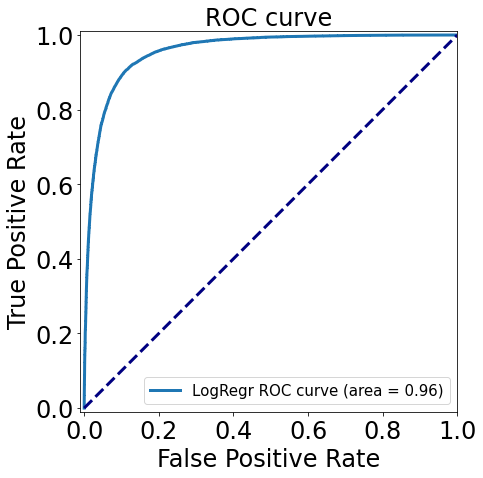

Cutt off is calculated to be 0.9724078496865195
[[30708  3568]
 [ 3583 30838]]
The test set, precision: 0.8962971574725339, recall: 0.895906568664478, f1 score: 0.8961018205064872
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     34276
           1       0.90      0.90      0.90     34421

    accuracy                           0.90     68697
   macro avg       0.90      0.90      0.90     68697
weighted avg       0.90      0.90      0.90     68697

y_all: 68697, lst_pred_prob: 68697, 
for_tjur_rs_test is saved!


In [18]:
ver_name = list_embedding_file[19:] + '_test_set.png'
precision, recall, f1_score, model_auc_roc = lp.evaluate_test_set(ver_name, model = 'Logit')